# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [62]:
from sklearn import tree 

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [63]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [64]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [65]:
print(clf.predict([[0, 1, 1]]))

[0]


In [66]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


In [67]:
#install graphviz
#conda install python-graphviz


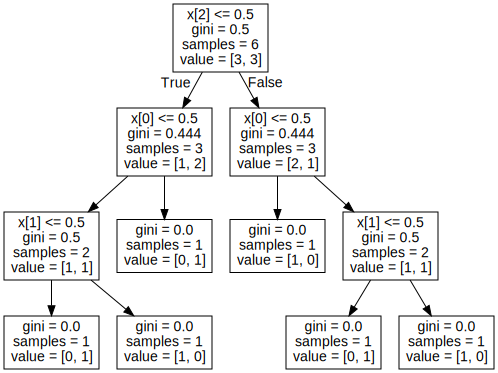

In [68]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

Ora andremo ad utilizzare un dataset vero e proprio, il dataset IRIS.

Il dataset è formato da 4 features numeriche
- lunghezza sepali
- larghezza sepali
- lunghezza petali
- larghezza  petali

e da 3 classi
- iris setosa -> classe 0
- iris versicolor -> classe 1
- iris virginica -> classe 2

è un dataset bilanciato con 50 esempi per classe

In [69]:
from sklearn.datasets import load_iris
iris = load_iris()

# Declare the type of prediction model and the working criteria for the model induction algorithm

Come iperparametri specifichiamo
- criterion è il criterio di split: entropia
- random state serve per fare delle scelte sul dataset in training e test set (non è indispensabile)
- min sample leaf è il valore minimo del numero dei campioni per foglia (evita l'overfitting)
- class weight sono i pesi da associare alle classi, per il momento diamo a tutte e tre le classi lo stesso peso

PS. irisi versicolor e iris virginica possono confondere il nostro modello; nostro compito sarà quello di fare il tuning degli iperparametri per migliorare le capacità predittive del modello (ad esempio, aumentando il peso della classe 0).


In [70]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [71]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [72]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [73]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [74]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [75]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 70: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # 87: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 36: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 21: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # 9: 
sepal length (cm)=4.9, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.1
Predicted: setosa	 True: setosa

Instance # 103: 
sepal length (cm)=6.3, sepal width (cm)=2.9, petal length (cm)=5.6, petal width (cm)=1.8
Predicted: virginica	 True: virginica

Insta

# Obtain model performance results

importiamo
- Accuracy score
- F1 score: è una media armonica tra precision e recall (F1 = 2 * (precision * recall) / (precision + recall))
  PS. di default l'F1 score ha come average = binary e fa quel calcolo qua sopra. E' possibile settare
  - Micro: fa la media tra i FP e FN 
  - Macro: calcola separatamente precision e recall e poi fa la media tra le due
  - Weighted: permette di fare una media pesata tra precision e recall, andando a specificare i due pesi
  - Samples: ...
  Molte volte micro e macro coincidono; però la media di tipo macro non prende in considerazione lo sbilanciamento delle etichette

In [76]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

Per avere una previsione più attendibile della accuratezza è meglio usare la cross validation

In [77]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test

iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # senza specificare lo scoring usa l'accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [78]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [79]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [80]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


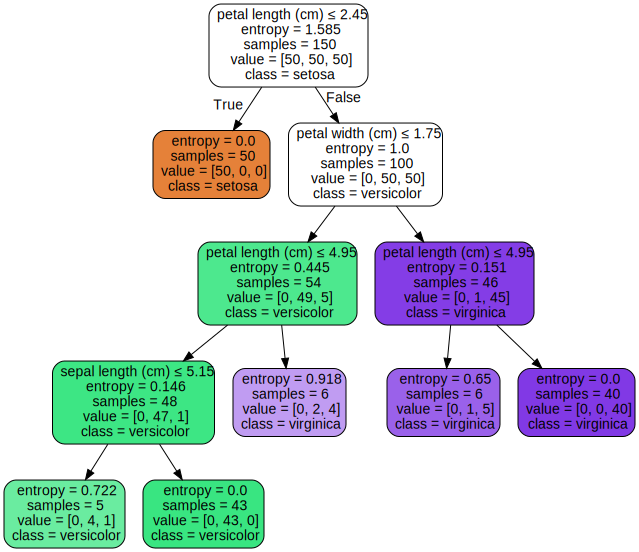

In [81]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [82]:
from sklearn.datasets import load_iris

def getInflactedIrisDataset(test_size = 60):
    iris = load_iris()
    iris_data_with_target = np.c_[iris.data, iris.target]

    iris_data_with_target_0 = iris_data_with_target[iris_data_with_target[:,-1]==0]
    iris_data_with_target_1 = iris_data_with_target[iris_data_with_target[:,-1]==1]
    iris_data_with_target_2 = iris_data_with_target[iris_data_with_target[:,-1]==2]

    iris_data_with_target_1 = np.repeat(iris_data_with_target_1, 10, axis=0)
    #iris_data_with_target_2 = np.repeat(iris_data_with_target_2, 10, axis=0)

    #unsisci i tre array
    iris_data_with_target = np.concatenate((iris_data_with_target_0, iris_data_with_target_1, iris_data_with_target_2), axis=0)
    #separa le features dalle classi
    iris_data = iris_data_with_target[:,:-1]
    iris_target = iris_data_with_target[:,-1]

    np.random.seed(0)
    indices = np.random.permutation(len(iris_data_with_target))

    # We now decide to keep the last 10 indices for test set, the remaining for the training set
    indices_training = indices[:-test_size]
    indices_test = indices[-test_size:]

    iris_X_train = iris_data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
    iris_y_train = iris_target[indices_training]
    iris_X_test  = iris_data[indices_test] # keep the last 10 elements for test set
    iris_y_test  = iris_target[indices_test]

    return iris_X_train, iris_y_train, iris_X_test, iris_y_test

In [83]:
from sklearn.datasets import load_iris
import numpy as np

def getIrisDataset(test_size = 10):
    iris = load_iris()

    np.random.seed(0)
    indices = np.random.permutation(len(iris.data))

    # We now decide to keep the last 10 indices for test set, the remaining for the training set
    indices_training=indices[:-test_size]
    indices_test=indices[-test_size:]

    iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
    iris_y_train = iris.target[indices_training]
    iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
    iris_y_test  = iris.target[indices_test]

    return iris_X_train, iris_y_train, iris_X_test, iris_y_test

# 1) ARTIFICIAL INFLACTION

Applicate un sovracampionamento (artificial inflation) ad una classe nel training set con un determinato fattore: 10 (si pesi di più una delle classi tra virginica o versicolor che sono più difficili da discriminare). Si apprenda l'albero di decisione in queste condizioni. Attenzione che in questo caso la suddivisione tra training set e test set non deve rilasciare nel test set nessuna delle copie che abbiamo aggiunto, altrimenti si favorirebbe troppo il classificatore dando copie presenti nel training set anche nel test set. Quindi se volete usare la crossvalidation, dovete farla voi, da programma Python "a mano" (e non usare quella fornita da scikit learn, che non fa questo controllo)

In [84]:
iris_X_train, iris_y_train, iris_X_test, iris_y_test = getInflactedIrisDataset()

In [85]:
def inflateDataset(data, target, factor, class_to_inflate):
    data_with_target = np.c_[data, target]

    data_with_target_to_inflate = data_with_target[data_with_target[:,-1]==class_to_inflate]
    data_with_target_to_inflate = np.repeat(data_with_target_to_inflate, factor, axis=0)
    data_with_target = np.concatenate((data_with_target, data_with_target_to_inflate), axis=0)

    data = data_with_target[:,:-1]
    target = data_with_target[:,-1]

    return data, target

'''
    np.random.seed(0)
    indices = np.random.permutation(len(iris_data_with_target))

    # We now decide to keep the last 10 indices for test set, the remaining for the training set
    indices_training = indices[:-test_size]
    indices_test = indices[-test_size:]

    iris_X_train = iris_data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
    iris_y_train = iris_target[indices_training]
    iris_X_test  = iris_data[indices_test] # keep the last 10 elements for test set
    iris_y_test  = iris_target[indices_test]'''

def inflation_cross_val_score(clf, X, y, cv=5, classToInflate = 2):
    scores = []

    #make a permutation of the dataset
    np.random.seed(0)
    indices = np.random.permutation(len(X))
    X = X[indices]
    y = y[indices]

    #divide x in cv parti
    data_folds = np.array_split(X, cv)
    target_folds = np.array_split(y, cv)

    for i in range(cv):
        current_data_training_set = np.concatenate(data_folds[:i] + data_folds[i+1:], axis=0)
        current_target_training_set = np.concatenate(target_folds[:i] + target_folds[i+1:], axis=0)
        current_data_training_set, current_target_training_set = inflateDataset(current_data_training_set, current_target_training_set, 10, classToInflate)

        current_data_test_set = data_folds[i]
        current_target_test_set = target_folds[i]

        clf.fit(current_data_training_set, current_target_training_set)
        score = clf.score(current_data_test_set, current_target_test_set)

        scores.append(score)
    
    return scores


clf1 = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf1 = clf1.fit(iris_X_train, iris_y_train)

iris = load_iris()

predicted_y_test_inflated = clf1.predict(iris_X_test)
cross_scores_inflated = inflation_cross_val_score(clf1, iris.data, iris.target, cv=5) # score will be the accuracy
print("Cross validation scores: ", cross_scores_inflated)

Cross validation scores:  [0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9]


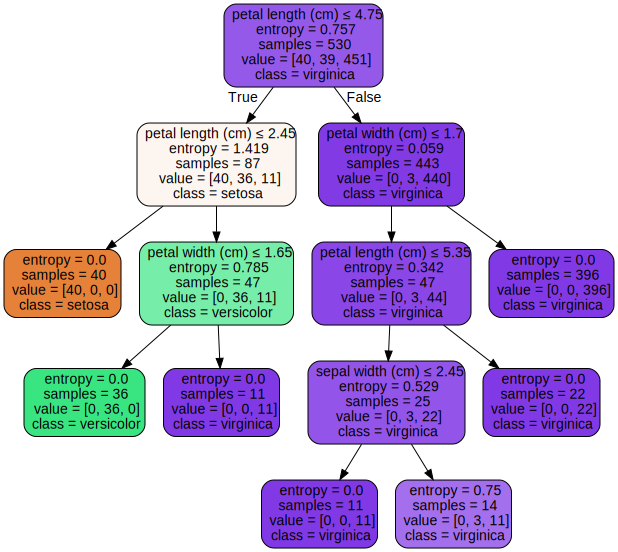

In [86]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# 2) CAMBIO DEI PESI

modifcare i pesi della stessa classe (si metta a 10 il peso per l'errata predizione ad esempio di Virginica in Versicolor o viceversa) e si apprenda l'albero in queste condizioni. Dovreste ottenere risultati simili a quelli del punto 1.

In [87]:
import numpy as np

iris_X_train, iris_y_train, iris_X_test, iris_y_test = getIrisDataset()

In [88]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=10, class_weight={0:1,1:1,2:10})
clf2 = clf2.fit(iris_X_train, iris_y_train)

predicted_y_test_unbalanced = clf2.predict(iris_X_test)

# print some metrics results
acc_score = accuracy_score(iris_y_test, predicted_y_test_unbalanced)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test_unbalanced, average='macro')
print("F1 score: "+str(f1))
cross_scores_unbalanced = cross_val_score(clf2, iris.data, iris.target, cv=5) # score will be the accuracy
print("Cross-validation accuracy: "+str(cross_scores_unbalanced))

Accuracy score: 0.9
F1 score: 0.8857142857142858
Cross-validation accuracy: [0.93333333 0.83333333 0.83333333 0.83333333 1.        ]


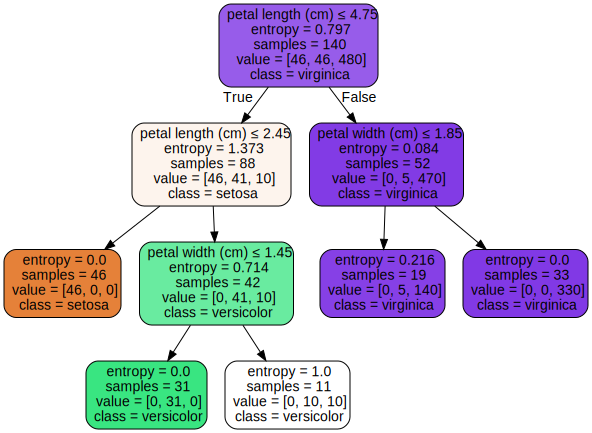

In [89]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# 3) TUNING DEI PARAMETRI

Si apprendano gli alberi cercando di evitare l'overfitting (migliorando l'errore sul test set) facendo 'tuning' degli iper-parametri: il minimo numero dei campioni per foglia, la massima profondità dell'albero, i parametri di minomo decremento dell'impurezza, massimo numero dei nodi foglia, ecc.

GridSearchCV: funzione che viene utilizzata per eseguire la ricerca del miglior set di iperparametri per un modello di machine learning.

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = [{
    'criterion': ["entropy","gini"], 
    'max_depth': range(1,10),
    'max_leaf_nodes': range(3,15),
    'class_weight': [{0:1,1:1,2:1}, {0:1,1:1,2:10}, {0:1,1:10,2:1}, {0:1,1:10,2:10}],
}]

Tuning su inflacted dataset

In [103]:
iris_X_train, iris_y_train, iris_X_test, iris_y_test = getInflactedIrisDataset()

clf3 = tree.DecisionTreeClassifier()
    
search_inf = GridSearchCV(clf3, param_grid, cv=5) # grids search 
search_inf.fit(iris_X_train, iris_y_train)
search_inf.best_params_

{'class_weight': {0: 1, 1: 10, 2: 1},
 'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 6}

Tuning su dataset di partenza

In [104]:
iris_X_train, iris_y_train, iris_X_test, iris_y_test = getIrisDataset()

clf4 = tree.DecisionTreeClassifier()

search_unb = GridSearchCV(clf4, param_grid, cv=5)
search_unb.fit(iris_X_train, iris_y_train)
search_unb.best_params_

{'class_weight': {0: 1, 1: 1, 2: 1},
 'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 4}

# 4) MATRICE DI CONFUSIONE

si costruisca la matrice di confusione dell'albero creato sul test set e la si visualizzi

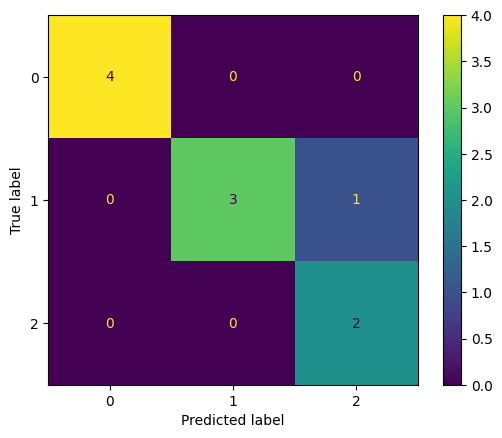

Accuracy score: 0.9


In [128]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import accuracy_score

iris_X_train, iris_y_train, iris_X_test, iris_y_test = getIrisDataset()
clf2 = tree.DecisionTreeClassifier(class_weight = {0: 1, 1: 1, 2: 1}, criterion = 'entropy', max_depth = 3, max_leaf_nodes = 4)
clf2 = clf2.fit(iris_X_train, iris_y_train)
predicted_y_test_unbalanced = clf2.predict(iris_X_test)


def confusion_matrix(actual, predicted):
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
  cm_display.plot()
  plt.show()

confusion_matrix(iris_y_test, predicted_y_test_unbalanced)

#accuracy
acc_score = accuracy_score(iris_y_test, predicted_y_test_unbalanced)
print("Accuracy score: "+ str(acc_score))

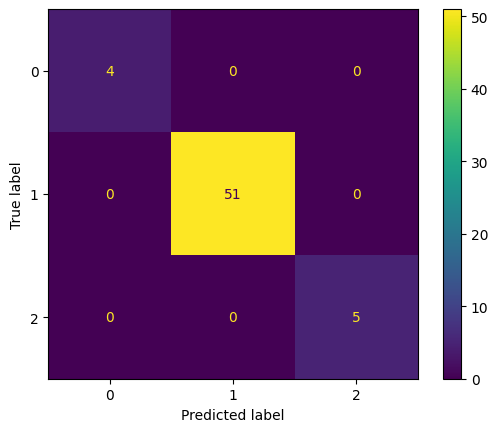

Accuracy score: 1.0


In [129]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import accuracy_score

iris_X_train_inflated, iris_y_train_inflated, iris_X_test_inflated, iris_y_test_inflated = getInflactedIrisDataset()
clf3 = tree.DecisionTreeClassifier(class_weight = {0: 1, 1: 10, 2: 1}, criterion = 'gini', max_depth = 5, max_leaf_nodes = 6)
clf3 = clf3.fit(iris_X_train_inflated, iris_y_train_inflated)
predicted_y_test_inflated = clf3.predict(iris_X_test_inflated)

def confusion_matrix(actual, predicted):
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
  cm_display.plot()
  plt.show()

confusion_matrix(iris_y_test_inflated, predicted_y_test_inflated)

#accuracy
print("Accuracy score: "+ str(accuracy_score(iris_y_test_inflated, predicted_y_test_inflated)))

# ROC CURVE

si costruiscano le curve ROC (o curve nello spazio di coverage) e le si mostri per ciascun modello ad albero creato su un problema binario (con 1 sola classe positiva): per ciascun modello dovete costruire tre curve, una per ciascuna classe, considerata a turno la classe positiva.

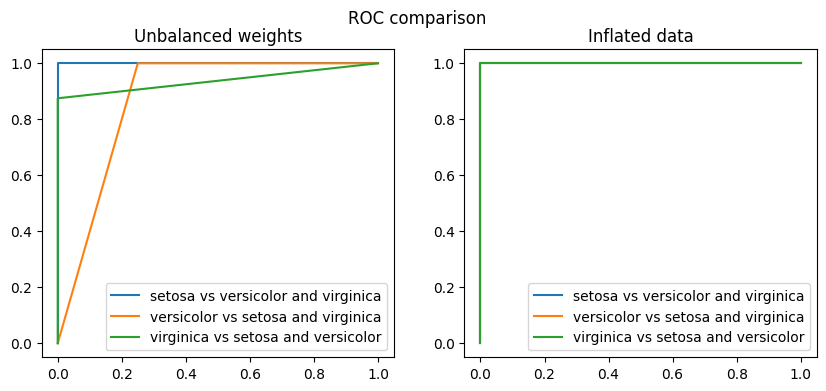

In [130]:
from sklearn.metrics import roc_curve

fig, (ax1, ax2) = plt.subplots(1,2)
legend_elements = [ iris.target_names[0] + " vs " + iris.target_names[1] + " and " + iris.target_names[2],
                    iris.target_names[1] + " vs " + iris.target_names[0] + " and " + iris.target_names[2],
                    iris.target_names[2] + " vs " + iris.target_names[0] + " and " + iris.target_names[1]]

for t in [0,1,2]:
    y_binary = [0 if y == t else 1 for y in iris_y_test]
    y_pred_binary = [0 if y == t else 1 for y in predicted_y_test_unbalanced]

    fpr, tpr, thresholds = roc_curve(y_binary, y_pred_binary, drop_intermediate=False)
    ax1.plot(fpr, tpr)

ax1.legend(legend_elements)
ax1.title.set_text("Unbalanced weights")

for t in [0,1,2]:
    y_binary = [0 if y == t else 1 for y in iris_y_test_inflated]
    y_pred_binary = [0 if y == t else 1 for y in predicted_y_test_inflated]

    fpr, tpr, thresholds = roc_curve(y_binary, y_pred_binary, drop_intermediate=False)
    ax2.plot(fpr, tpr)

ax2.legend(legend_elements)
ax2.title.set_text("Inflated data")

fig.set_figwidth(10)
fig.set_figheight(4)
fig.suptitle("ROC comparison", )

plt.show()